<a href="https://colab.research.google.com/github/GauraoM/Tensorflow/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### MNIST Dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape # shaoe of train images

(60000, 28, 28)

In [5]:
train_images[0, 23, 23] # 0th image, 23row- 23col(look into 1 pixel values)

194

In [6]:
train_labels[:10]  # the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# Classes in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

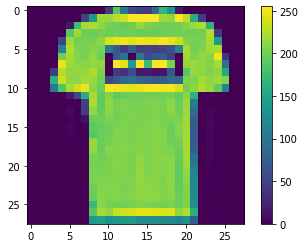

In [10]:
# Visualizing the image
plt.plot()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

#### Data Preprocessing
##### Converting values to range of 0-1

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

#### Building Model

In [12]:
# Building sequential model having one input layer, one hidden and one output layer
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax"),
])

#### Compiling

##### Define the loss function, optimizer and metrics

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model


In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5022 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3109 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2783 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

#### Evaluate the model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8872
Test Accuracy:  0.8871999979019165


#### Predictions

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[1]

array([2.2562519e-06, 6.9850249e-16, 9.9952865e-01, 5.1754548e-13,
       4.1409989e-04, 6.0199817e-14, 5.5084780e-05, 1.1916835e-15,
       6.5619274e-11, 1.9923331e-14], dtype=float32)

Pullover


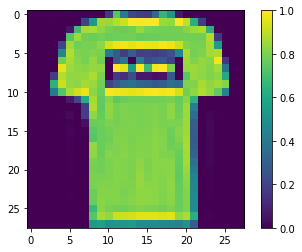

In [23]:
print(class_names[np.argmax(predictions[1])])
plt.plot()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

Pick a number: 32


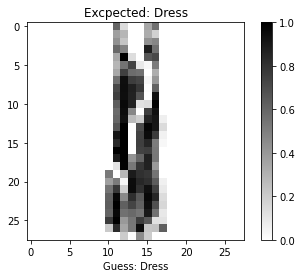

In [25]:
# Verifying Predictions

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

# print the image
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit(): # If number is ad igit
      num = int(num)
      if 0 <= num <= 1000: # If it is between 0-1000 then return number
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
